In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Digital Nest/Naive Bayes")
print (os.getcwd())

C:\Digital Nest\Naive Bayes


In [2]:
mushroom = pd.read_csv('mushroom.csv')
print(mushroom.shape)

(8416, 23)


In [3]:
print(mushroom.columns.values)

['Typeofmushroom' 'capshape' 'capsurface' 'capcolor' 'bruises' 'odor'
 'gillattachment' 'gillspacing' 'gillsize' 'gillcolor' 'stalkshape'
 'stalkroot' 'stalksurfaceabovering' 'stalksurfacebelowring'
 'stalkcolorabovering' 'stalkcolorbelowring' 'veiltype' 'veilcolor'
 'ringnumber' 'ringtype' 'sporeprintcolor' 'population' 'habitat']


In [4]:
# find missing values
mushroom.isnull().sum()

Typeofmushroom           0
capshape                 0
capsurface               0
capcolor                 0
bruises                  0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veiltype                 0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
dtype: int64

In [5]:
# check if there are any invalid values
for i in range(0,22,1):
    print(mushroom.columns.values[i])
    print(np.unique(mushroom.iloc[::,i:i+1:1]))

Typeofmushroom
['EDIBLE' 'POISONOUS']
capshape
['BELL' 'CONICAL' 'CONVEX' 'FLAT' 'KNOBBED' 'SUNKEN']
capsurface
['FIBROUS' 'GROOVES' 'SCALY' 'SMOOTH']
capcolor
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'GREEN' 'PINK' 'PURPLE' 'RED' 'WHITE'
 'YELLOW']
bruises
['BRUISES' 'NO']
odor
['ALMOND' 'ANISE' 'CREOSOTE' 'FISHY' 'FOUL' 'MUSTY' 'NONE' 'PUNGENT'
 'SPICY']
gillattachment
['ATTACHED' 'FREE']
gillspacing
['CLOSE' 'CROWDED']
gillsize
['BROAD' 'NARROW']
gillcolor
['BLACK' 'BROWN' 'BUFF' 'CHOCOLATE' 'GRAY' 'GREEN' 'ORANGE' 'PINK'
 'PURPLE' 'RED' 'WHITE' 'YELLOW']
stalkshape
['ENLARGING' 'TAPERING']
stalkroot
['?' 'BULBOUS' 'CLUB' 'EQUAL' 'ROOTED']
stalksurfaceabovering
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalksurfacebelowring
['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH']
stalkcolorabovering
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
stalkcolorbelowring
['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'ORANGE' 'PINK' 'RED' 'WHITE' 'YELLOW']
veiltype
['PARTIAL']
veilcolor
['BROWN' 'ORANGE' '

In [6]:
# stalkroot has '?'. it has to be replaced with most frequent category
print(np.unique(mushroom.stalkroot,return_counts=True))
print(mushroom.stalkroot.mode())

(array(['?', 'BULBOUS', 'CLUB', 'EQUAL', 'ROOTED'], dtype=object), array([2480, 3800,  568, 1376,  192], dtype=int64))
0    BULBOUS
dtype: object


In [7]:
# replace '?' in stalkroom with 'BULBOUS'
mushroom.loc[mushroom.stalkroot == "?","stalkroot"] = 'BULBOUS'

In [8]:
# stalkroot has '?'. it has to be replaced with most frequent category
print(np.unique(mushroom.stalkroot,return_counts=True))
print(mushroom.stalkroot.mode())

(array(['BULBOUS', 'CLUB', 'EQUAL', 'ROOTED'], dtype=object), array([6280,  568, 1376,  192], dtype=int64))
0    BULBOUS
dtype: object


In [12]:
# perform the encoding i.e. convert all categorical values into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushroom.Typeofmushroom = le.fit_transform(mushroom.Typeofmushroom)
mushroom.capshape       = le.fit_transform(mushroom.capshape)
mushroom.capsurface     = le.fit_transform(mushroom.capsurface)
mushroom.capcolor       = le.fit_transform(mushroom.capcolor)
mushroom.bruises        = le.fit_transform(mushroom.bruises)
mushroom.odor           = le.fit_transform(mushroom.odor)
mushroom.gillattachment = le.fit_transform(mushroom.gillattachment)
mushroom.gillspacing    = le.fit_transform(mushroom.gillspacing)
mushroom.gillsize       = le.fit_transform(mushroom.gillsize)
mushroom.gillcolor      = le.fit_transform(mushroom.gillcolor)
mushroom.stalkshape     = le.fit_transform(mushroom.stalkshape)
mushroom.stalkroot      = le.fit_transform(mushroom.stalkroot)
mushroom.stalksurfaceabovering = le.fit_transform(mushroom.stalksurfaceabovering)
mushroom.stalksurfacebelowring = le.fit_transform(mushroom.stalksurfacebelowring)
mushroom.stalkcolorabovering   = le.fit_transform(mushroom.stalkcolorabovering)
mushroom.stalkcolorbelowring   = le.fit_transform(mushroom.stalkcolorbelowring)
mushroom.veiltype       = le.fit_transform(mushroom.veiltype)
mushroom.veilcolor      = le.fit_transform(mushroom.veilcolor)
mushroom.ringnumber     = le.fit_transform(mushroom.ringnumber)
mushroom.ringtype       = le.fit_transform(mushroom.ringtype)
mushroom.sporeprintcolor = le.fit_transform(mushroom.sporeprintcolor)
mushroom.population      = le.fit_transform(mushroom.population)
mushroom.habitat         = le.fit_transform(mushroom.habitat)

In [13]:
mushroom.head()

,Typeofmushroom,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6


In [14]:
# split the file into Independent and dependent variables
mushroomY = mushroom.iloc[::,0:1:1]
print(mushroomY.shape)
mushroomX = mushroom.iloc[::,1::]
print(mushroomX.shape)

(8416, 1)
(8416, 22)


In [15]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mushroomX, mushroomY,
                                                    test_size = 0.30,
                                                    random_state = 0,
                                                    stratify = mushroomY)
print(X_train.shape)
print(X_test.shape)

(5891, 22)
(2525, 22)


In [17]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=0.2)
MNB.fit(X_train,Y_train.Typeofmushroom)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [17]:
np.unique(Y_train.Typeofmushroom,return_counts=True)

(array([0, 1]), array([3141, 2750], dtype=int64))

In [18]:
3153/(3153+2738)

0.5352232218638602

In [18]:
# apply the model on test
predictProb = MNB.predict_proba(X_test)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["class0","class1"])
predict = MNB_model.predict(X_test)
print(predict[0:5])

[[4.13098366e-05 9.99958690e-01]
 [9.93835683e-01 6.16431707e-03]
 [9.95865077e-01 4.13492340e-03]
 [1.19451134e-01 8.80548866e-01]
 [9.99723884e-01 2.76115582e-04]]
[1 0 0 1 0]


In [19]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predict))
print (classification_report(Y_test,predict))

[[1137  210]
 [ 222  956]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1347
           1       0.82      0.81      0.82      1178

    accuracy                           0.83      2525
   macro avg       0.83      0.83      0.83      2525
weighted avg       0.83      0.83      0.83      2525



In [20]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, PProb.class1)
print(AUC)

0.9086147547905613


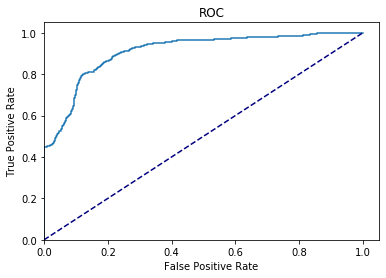

In [21]:
# plot the ROC curve
FPR, TPR, THR = roc_curve(Y_test, PProb.class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [27]:
ROC = pd.DataFrame({"THR":THR,
                   "TPR":TPR,
                   "FPR":FPR})
ROC.to_excel('ROC_NB.xlsx')